In [45]:
import numpy as np
import pandas as pd


In [46]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.drop(['PassengerId','Name','Ticket'] ,axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [48]:
dftypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtypes" : dftypes,"Num_Unique" : n_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,int64,int64,object,float64,int64,int64,float64,object,object
Num_Unique,2,3,2,88,7,7,248,147,3


In [49]:
# def chk(df):
#     dftypes = df.dtypes
#     n_unique = df.nunique()
#     return pd.DataFrame({"Dtypes" : dftypes,"Num_Unique" : n_unique}).T

In [50]:
# chk(df)

In [51]:
from peprocessing import chk
chk(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,int64,int64,object,float64,int64,int64,float64,object,object
Num_Unique,2,3,2,88,7,7,248,147,3


In [52]:
cols = ['Survived' , 'Pclass' , 'Sex' , 'SibSp' , 'Parch' , 'Embarked']
df[cols] = df[cols].astype('category')


In [53]:
chk(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,category,category,category,float64,category,category,float64,object,category
Num_Unique,2,3,2,88,7,7,248,147,3


Make function change the data type

In [54]:
""" def chng_type():
    df[cols] = df[cols].astype('category') """

" def chng_type():\n    df[cols] = df[cols].astype('category') "

In [55]:
df.shape

(891, 9)

In [56]:
df.shape[0]

891

In [57]:
null = df.isnull().sum()
ratio = (null / df.shape[0])*100
pd.DataFrame({"Nulls" : null,"Ratio" : ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Nulls,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [58]:
# def Nulls_chking(df):
#     null = df.isnull().sum()
#     ratio = (null / df.shape[0])*100
#     return pd.DataFrame({"Nulls" : null,"Ratio" : ratio}).T

# Nulls_chking(df)

In [59]:
from Pp import Nulls_chking

Nulls_chking(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Nulls,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [60]:
df = df.dropna(subset=['Embarked'])

In [61]:
df = df.drop('Cabin' , axis = 1)

In [62]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [63]:
median = df['Age'].median()

df['Age'].fillna(median , inplace=True)
df.head()

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_35676\731262613.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median , inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [64]:
Nulls_chking(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df.describe()

,Age,Fare
count,889.000000,889.000000
mean,29.315152,32.096681
std,12.984932,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    category
 1   Pclass    889 non-null    category
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    category
 5   Parch     889 non-null    category
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(6), float64(2)
memory usage: 27.2 KB


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

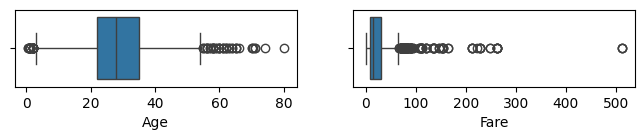

In [72]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
    plt.subplot(1, 2 , i+1)
    sns.boxplot(df[col], orient='h')




In [86]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print(IQR)

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    lower_outliers = df[df[col] < lower_fence][col].values
    upper_outliers = df[df[col] > upper_fence][col].values
    
    df[col].replace(lower_outliers , lower_fence , inplace=True)
    df[col].replace(upper_outliers , upper_fence , inplace=True)




13.0
23.1042


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_35676\1449001930.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(lower_outliers , lower_fence , inplace=True)
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_35676\1449001930.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

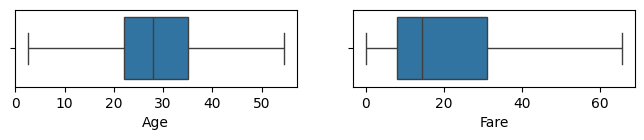

In [87]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
    plt.subplot(1, 2 , i+1)
    sns.boxplot(df[col], orient='h')


In [88]:
df.duplicated().sum()

np.int64(129)

In [ ]:
df.drop_duplicates(inplace=True)

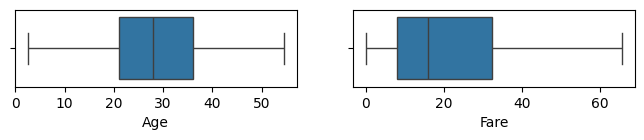

In [90]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
    plt.subplot(1, 2 , i+1)
    sns.boxplot(df[col], orient='h')
